In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

[0.9217318900915903, 0.7306411323896752, 0.2154454621149042, 0.41215653621981685, 0.14837635303913405, 0.974188176519567, 0.11015820149875102, 0.5882597835137385, 0.6669442131557035]
[0.01019147863752532, 0.009280877302147928, 0.002473129360026766, 0.0048557741799479795, 0.0018661638587611266, 0.010461890452486234, 0.0011149043017900163, 0.005785497264727928, 0.00624646002034262]


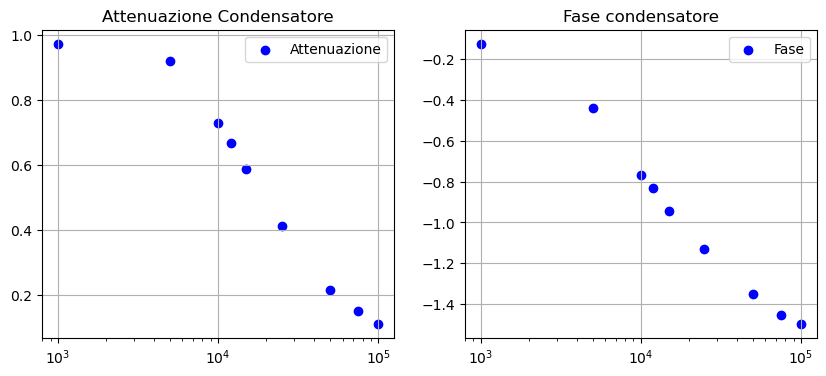

In [11]:
R = 6730 #Ohm
C = 0.000000002056 #F
errVout = [0.04, 0.04, 0.01, 0.02, 0.008, 0.04, 0.004, 0.02, 0.02]  #Volt
errVin = [0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04]  #Volt
errt = [0.000001, 0.0000004, 0.0000001, 0.0000002, 0.00000004, 0.000004, 0.00000004, 0.0000002, 0.0000002] #s
l = len(errVout)
F = [5000, 10000, 50000, 25000, 75000, 1000, 100000, 15000, 12000]
W = [(2*math.pi*F[i]) for i in range(l)]
Vin = [5.40, 5.40, 5.28, 5.32, 5.28, 5.32, 5.24, 5.4, 5.4]
AvVin = sum(Vin)/len(Vin)
Vinn = [AvVin for i in range(l)]
Vout = [4.92, 3.90, 1.15, 2.20, 0.792, 5.20, 0.588, 3.14, 3.56]

A = [Vout[i]/Vinn[i] for i in range(l)]
errA = [A[i]*math.sqrt((errVin[i]/Vinn[i])**2+(errVout[i]/Vout[i])**2) for i in range(l)]
t = [0.000014, 0.0000122, 0.0000043, 0.0000072, 0.00000308, 0.000020, 0.00000238, 0.000010, 0.000011]
phi = [-2*math.pi*t[i]/(1/F[i]) for i in range(l)]
errphi = [2*math.pi*(errt[i]/(1/F[i])) for i in range(l)]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

#attenuazione
axes[0].scatter(F, A, label='Attenuazione', color='blue')
axes[0].set_title('Attenuazione Condensatore')
axes[0].legend()
axes[0].set_xscale('log')
axes[0].grid(True)

#fase
axes[1].scatter(F, phi, label='Fase', color='blue')
axes[1].set_title('Fase condensatore')
axes[1].legend()
axes[1].set_xscale('log')
axes[1].grid(True)

print(A)
print(errA)

In [46]:
Fexp = 1/(R*C*2*math.pi)
print("{} Hz".format(Fexp))

11502.227604192227 Hz


In [48]:
def Ac(F, F0):
    return 1 / np.sqrt(1 + (F / F0)**2)
least_squares = LeastSquares(F, A, errA, Ac)
m = Minuit(least_squares, F0 = Fexp)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 14.89 (χ²/ndof = 1.9)      │              Nfcn = 18               │
│ EDM = 2.58e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  11.07e3  │  0.06e3   │  -0.06e3   │   0.06e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │    -60    │    60     │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 3.37e+03 │
└────┴──────────┘

In [60]:
def phic(F, F0):
    return np.arctan(-F/F0)
least_squares1 = LeastSquares(F, phi, errphi, phic)
m1 = Minuit(least_squares1, F0 = Fexp)
m1.migrad()
m1.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.088 (χ²/ndof = 0.9)      │              Nfcn = 22               │
│ EDM = 1.64e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ F0   │  10.80e3  │  0.22e3   │  -0.21e3   │   0.22e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │          F0           │
├──────────┼───────────┬───────────┤
│  Error   │  -0.21e3  │  0.22e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌────┬──────────┐
│    │       F0 │
├────┼──────────┤
│ F0 │ 4.63e+04 │
└────┴──────────┘

Text(0, 0.5, 'Fase (Rad)')

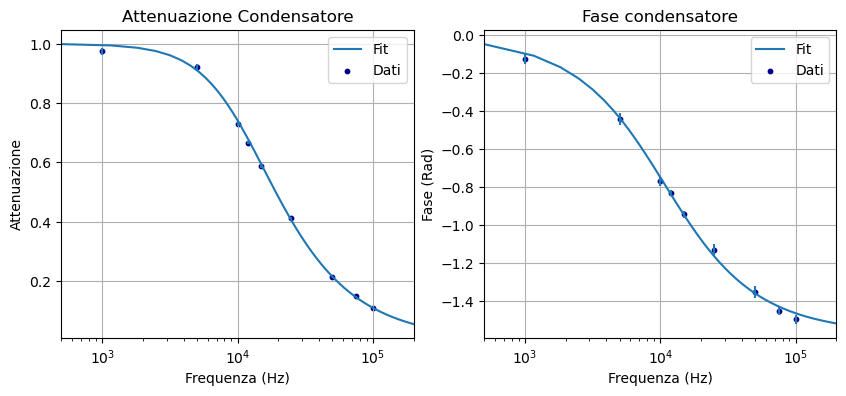

In [62]:
figg, axess = plt.subplots(1, 2, figsize=(10, 4))
F0a, F0p = m.values[0], m1.values[0]
errF0a, errF0p = m.errors[0], m1.errors[0]
x = np.linspace(min(F)/2,max(F)*2,300)
#attenuazione
axess[0].plot(x,Ac(x,F0a), label = 'Fit')
axess[0].scatter(F, A, label='Dati', color='darkblue', s = 10)
axess[0].set_title('Attenuazione Condensatore')
axess[0].legend()
axess[0].set_xscale('log')
axess[0].grid(True)
axess[0].errorbar(F, A, yerr=errA, fmt = 'none')
axess[0].set_xlim(min(F)/2,max(F)*2)
axess[0].set_xlabel("Frequenza (Hz)")
axess[0].set_ylabel("Attenuazione")
#fase
axess[1].plot(x,phic(x,F0p), label = 'Fit')
axess[1].scatter(F, phi, label='Dati', color='darkblue', s = 10)
axess[1].set_title('Fase condensatore')
axess[1].legend()
axess[1].set_xscale('log')
axess[1].grid(True)
axess[1].errorbar(F, phi, yerr=errphi, fmt = 'none')
axess[1].set_xlim(min(F)/2,max(F)*2)
axess[1].set_xlabel("Frequenza (Hz)")
axess[1].set_ylabel("Fase (Rad)")

In [64]:
print("F0 fase condensatore {} +/- {}".format(F0p,errF0p))
print("F0 attenuazione condensatore {} +/- {}".format(F0a,errF0a))

10801.34212106799 +/- 215.19432396123344
11067.2616927352 +/- 58.05243701546427
